In [1]:
%matplotlib inline

import pandas as pd
import topic_modeling as tm

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('individual_review.csv')

In [3]:
df.head()

,inspection_id,restaurant_id,review_id,inspection_penalty_score,rating,content
0,DA2383404,ZriNDCVxkCdVEO-X2sjHFw,review_Q9_9A9QmmpX4unYRcEQc8g,0,5,We went here this past weekend with zero expec...
1,DA2304227,ZriNDCVxkCdVEO-X2sjHFw,review_IveKyEloRTk8bHJ8xcpalA,0,4,Lots of young families . Kind of sparse &#160;...
2,DA2304227,ZriNDCVxkCdVEO-X2sjHFw,review_1pIZlx4k7U8S-_dX-kzb4w,0,4,Our favorite teriyaki in West Seattle! Generou...
3,DA2304227,ZriNDCVxkCdVEO-X2sjHFw,review_iaieVt5Tm_US0LTsHMSC6Q,0,4,Seattle has a lot of great teriyaki. &#160;Thi...
4,DA2278690,ZriNDCVxkCdVEO-X2sjHFw,review_WxjHfhYRD3heTI6ETb7sdg,40,4,This place is a gem! My husband and I didn't h...


## Negative Model

In [4]:
df_negative = df[df.rating == 1]

Preprocessing done.
Get prerequisites done.
LDA modeling done.
Topics and Representative Keywords
[(0,
  '0.072*"meat" + 0.061*"dry" + 0.061*"pho" + 0.057*"soup" + 0.052*"noodle" + '
  '0.050*"shrimp" + 0.035*"bowl" + 0.031*"bean" + 0.027*"hate" + '
  '0.026*"veggie"'),
 (1,
  '0.102*"taste" + 0.086*"chicken" + 0.068*"dish" + 0.057*"sauce" + '
  '0.042*"rice" + 0.032*"flavor" + 0.030*"bland" + 0.019*"beef" + '
  '0.018*"chinese" + 0.017*"spicy"'),
 (2,
  '0.160*"burger" + 0.132*"fry" + 0.048*"slice" + 0.030*"onion" + '
  '0.026*"lettuce" + 0.022*"corn" + 0.021*"single" + 0.020*"brother" + '
  '0.018*"ivar" + 0.016*"wrap"'),
 (3,
  '0.068*"service" + 0.066*"wait" + 0.060*"table" + 0.037*"drink" + '
  '0.033*"server" + 0.030*"leave" + 0.029*"sit" + 0.027*"bar" + 0.023*"friend" '
  '+ 0.023*"seat"'),
 (4,
  '0.073*"order" + 0.052*"come" + 0.048*"time" + 0.047*"say" + 0.045*"get" + '
  '0.039*"back" + 0.036*"take" + 0.030*"ask" + 0.027*"never" + 0.026*"tell"'),
 (5,
  '0.085*"pay" + 0.055*

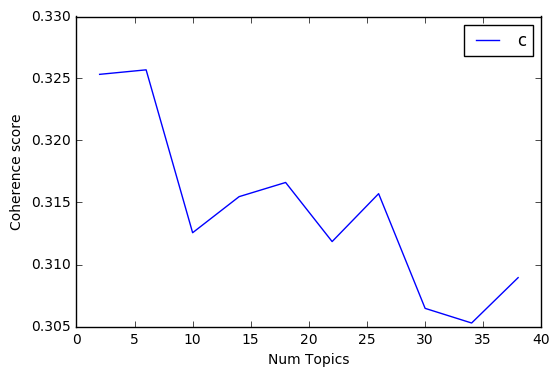

In [5]:
lda_model_n, corpus_n, id2word_n = tm.main(df_negative, content_col_name = 'content', model_name = 'negative', customized_stopwords = False, filter_extremes = True, save_pickle = True, print_result = True, find_optimal = True)

## Visualization

In [8]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model_n, corpus_n, id2word_n)
vis

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
16     22.200281        1       1  0.297936 -0.087944
4      18.014652        1       2  0.295966  0.086128
12     10.354562        1       3  0.201154 -0.148955
3      10.038419        1       4  0.191771  0.197723
19      7.942700        1       5  0.069830 -0.230354
10      6.483586        1       6  0.125367  0.076012
1       3.840788        1       7 -0.057123  0.004873
5       3.257786        1       8 -0.073053  0.236149
14      3.001920        1       9 -0.067219  0.139119
9       2.201797        1      10 -0.080381  0.060518
0       2.081276        1      11 -0.082760  0.060145
18      1.660722        1      12 -0.087228 -0.010571
11      1.357890        1      13 -0.089738 -0.025932
2       1.282085        1      14 -0.090691 -0.024692
6       1.280871        1      15 -0.087847 -0.069625
13      1.151436        1      16 -0.093625 -0.021825
7       1.075923        1      17 -0.094292 -0.051863
8       1.035060        1      18 -0.090185 -0.066281
15      0.934593        1      19 -0.094637 -0.061435
17      0.803654        1      20 -0.093243 -0.061187, topic_info=     Category         Freq           Term        Total  loglift  logprob
term                                                                    
1416  Default  7781.000000          place  7781.000000  30.0000  30.0000
4071  Default  7585.000000          order  7585.000000  29.0000  29.0000
4044  Default  6559.000000           good  6559.000000  28.0000  28.0000
1671  Default  3909.000000            bad  3909.000000  27.0000  27.0000
563   Default  3869.000000           wait  3869.000000  26.0000  26.0000
847   Default  5723.000000           come  5723.000000  25.0000  25.0000
1172  Default  1732.000000          pizza  1732.000000  24.0000  24.0000
416   Default  4870.000000            say  4870.000000  23.0000  23.0000
729   Default  3493.000000          table  3493.000000  22.0000  22.0000
1355  Default  4479.000000        service  4479.000000  21.0000  21.0000
2709  Default  5161.000000           time  5161.000000  20.0000  20.0000
2443  Default  2262.000000          taste  2262.000000  19.0000  19.0000
4102  Default  2654.000000         people  2654.000000  18.0000  18.0000
827   Default  1973.000000           menu  1973.000000  17.0000  17.0000
1162  Default  4046.000000           back  4046.000000  16.0000  16.0000
1488  Default  3733.000000           take  3733.000000  15.0000  15.0000
2122  Default  1921.000000        chicken  1921.000000  14.0000  14.0000
2748  Default  7600.000000            get  7600.000000  13.0000  13.0000
3681  Default  3764.000000            eat  3764.000000  12.0000  12.0000
3288  Default  1605.000000            pay  1605.000000  11.0000  11.0000
3237  Default  1185.000000         burger  1185.000000  10.0000  10.0000
266   Default  1435.000000          price  1435.000000   9.0000   9.0000
4122  Default  1519.000000           dish  1519.000000   8.0000   8.0000
1424  Default  2146.000000          drink  2146.000000   7.0000   7.0000
3717  Default  1904.000000       waitress  1904.000000   6.0000   6.0000
773   Default  1724.000000       customer  1724.000000   5.0000   5.0000
2114  Default  2759.000000           tell  2759.000000   4.0000   4.0000
87    Default  3656.000000         minute  3656.000000   3.0000   3.0000
1541  Default  3451.000000            ask  3451.000000   2.0000   2.0000
4019  Default  2890.000000          never  2890.000000   1.0000   1.0000
...       ...          ...            ...          ...      ...      ...
1172  Topic20  1731.752734          pizza  1732.700467   4.8232  -0.9872
2402  Topic20   144.947160        topping   145.894893   4.8172  -3.4677
763   Topic20    86.351201           oven    87.298934   4.8128  -3.9856
470   Topic20    78.496387         yelper    79.444120   4.8118  -4.0810
608   Topic20    76.142264           piss    77.089997   4.8114  -4.

## Positive Model

In [10]:
df_positive = df[df.rating == 5]

Preprocessing done.
Get prerequisites done.
LDA modeling done.
Topics and Representative Keywords
[(0,
  '0.063*"order" + 0.037*"dish" + 0.030*"sauce" + 0.030*"taste" + '
  '0.029*"dinner" + 0.025*"flavor" + 0.025*"salad" + 0.025*"perfect" + '
  '0.024*"sweet" + 0.021*"didn"'),
 (1,
  '0.058*"vegetarian" + 0.052*"option" + 0.047*"onion" + 0.039*"smell" + '
  '0.036*"pay" + 0.031*"shop" + 0.023*"mix" + 0.020*"salt" + 0.019*"not" + '
  '0.017*"sell"'),
 (2,
  '0.027*"crust" + 0.025*"evening" + 0.023*"space" + 0.021*"pair" + '
  '0.019*"cocktail" + 0.018*"creamy" + 0.017*"lamb" + 0.016*"macaroon" + '
  '0.014*"macaron" + 0.014*"roast"'),
 (3,
  '0.108*"beer" + 0.079*"enjoy" + 0.059*"selection" + 0.048*"location" + '
  '0.042*"bakery" + 0.035*"cool" + 0.026*"authentic" + 0.022*"white" + '
  '0.022*"forget" + 0.019*"extremely"'),
 (4,
  '0.120*"wait" + 0.056*"long" + 0.048*"area" + 0.034*"absolutely" + '
  '0.034*"minute" + 0.033*"family" + 0.033*"free" + 0.031*"talk" + '
  '0.030*"street" 

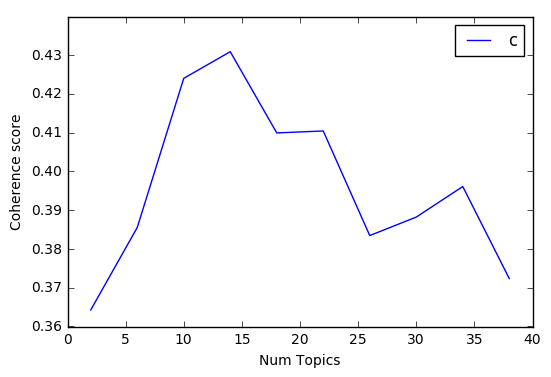

In [11]:
lda_model_p, corpus_p, id2word_p = tm.main(df_positive, content_col_name = 'content', model_name = 'positive', customized_stopwords = True, filter_extremes = True, save_pickle = True, print_result = True, find_optimal = True)